In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
veriler = pd.read_excel('covid19Vaccination.xlsx')

In [3]:
veriler.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [4]:
veriler.shape

(81, 13)

In [5]:
veriler.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,81.0,4.381420e+05,2.352658e+01,438102.0,438122.0,438142.0,438162.0,438182.0
SEQID,81.0,5.412000e+03,0.000000e+00,5412.0,5412.0,5412.0,5412.0,5412.0
_1DOSE,81.0,3.965429e+05,7.727379e+05,24128.0,106990.0,197631.0,395582.0,6197550.0
_2DOSE,81.0,1.828914e+05,3.171276e+05,13155.0,49145.0,98896.0,187138.0,2419591.0
_TOTAL,81.0,5.794343e+05,1.088717e+06,37283.0,157545.0,294010.0,580524.0,8617141.0
POPULATION,81.0,1.032276e+06,1.872576e+06,81910.0,284923.0,537762.0,1081065.0,15462452.0
DIFF_1DOSE,81.0,8.407407e+00,2.428311e+01,0.0,0.0,1.0,6.0,193.0
DIFF_2DOSE,81.0,4.938272e-01,1.574194e+00,0.0,0.0,0.0,0.0,11.0
DIFF_TOTAL,81.0,8.901235e+00,2.576461e+01,0.0,0.0,1.0,6.0,204.0
PREVID,81.0,4.380610e+05,2.352658e+01,438021.0,438041.0,438061.0,438081.0,438101.0


In [7]:
dose1 = veriler.sort_values(by='_1DOSE',ascending=False)
dose1.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


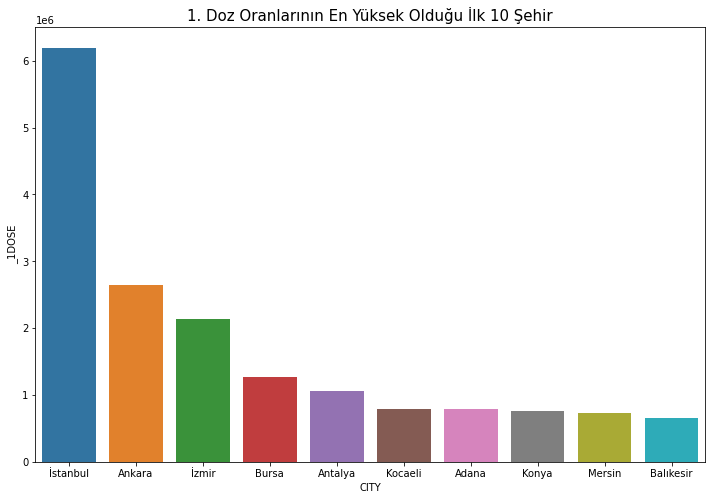

In [9]:
# 1. Doz Oranlarının En Yüksek Olduğu İlk 10 Şehir
plt.figure(figsize=(12,8))
sns.barplot(x=dose1.iloc[:10]["CITY"],y=dose1.iloc[:10]["_1DOSE"])
plt.title("1. Doz Oranlarının En Yüksek Olduğu İlk 10 Şehir",size=15)
plt.show()

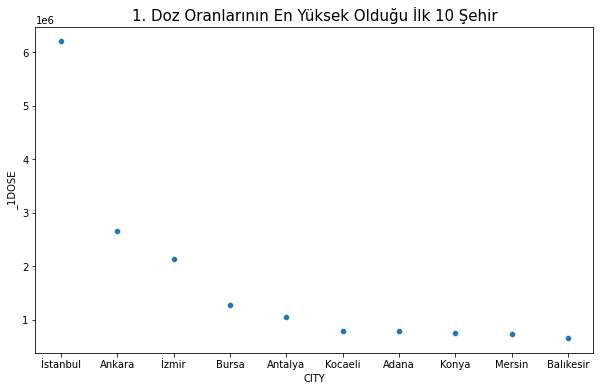

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=dose1.iloc[:10]["CITY"], y=dose1.iloc[:10]["_1DOSE"])
plt.title("1. Doz Oranlarının En Yüksek Olduğu İlk 10 Şehir", size=15)
plt.show()

In [10]:
dose2 = veriler.sort_values(by='_2DOSE',ascending=False)
dose2.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


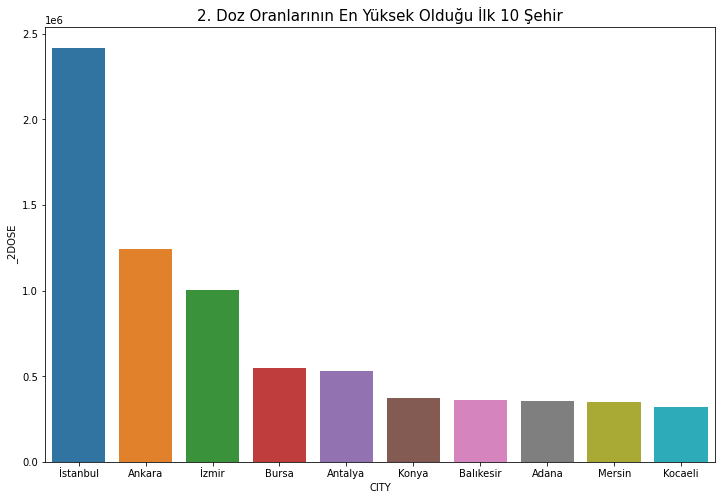

In [19]:
# 2. Doz Oranlarının En Yüksek Olduğu İlk 10 Şehir
plt.figure(figsize=(12,8))
sns.barplot(x=dose2.iloc[:10]["CITY"],y=dose2.iloc[:10]["_2DOSE"])
plt.title("2. Doz Oranlarının En Yüksek Olduğu İlk 10 Şehir",size=15)
plt.show()

In [21]:
total = veriler.sort_values(by='_TOTAL',ascending=False)
total.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


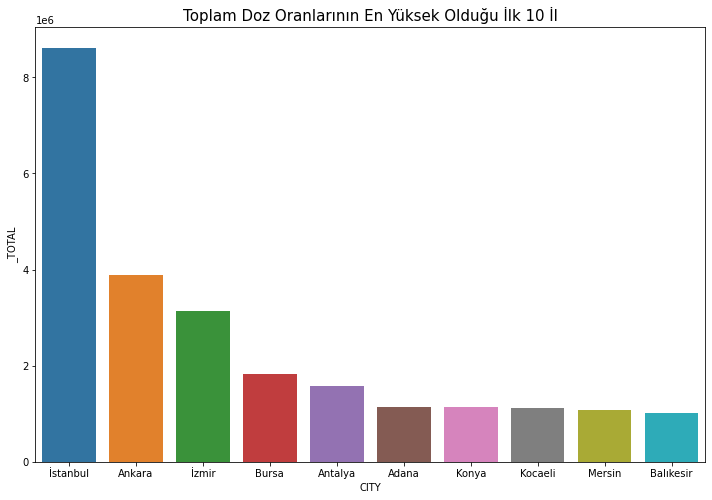

In [22]:
# Toplam Doz Oranlarının En Yüksek Olduğu İlk 10 İl
plt.figure(figsize=(12,8))
sns.barplot(x=total.iloc[:10]["CITY"],y=total.iloc[:10]["_TOTAL"])
plt.title("Toplam Doz Oranlarının En Yüksek Olduğu İlk 10 İl",size=15)
plt.show()

In [23]:
# Toplam doz yüzdesi kolonu oluşturuldu:

veriler["TOTAL_DOSE_PERCENTAGE"] = (veriler["_TOTAL"]/veriler["POPULATION"])*100
total_dose_percentage = veriler.sort_values(by="TOTAL_DOSE_PERCENTAGE", ascending=False)

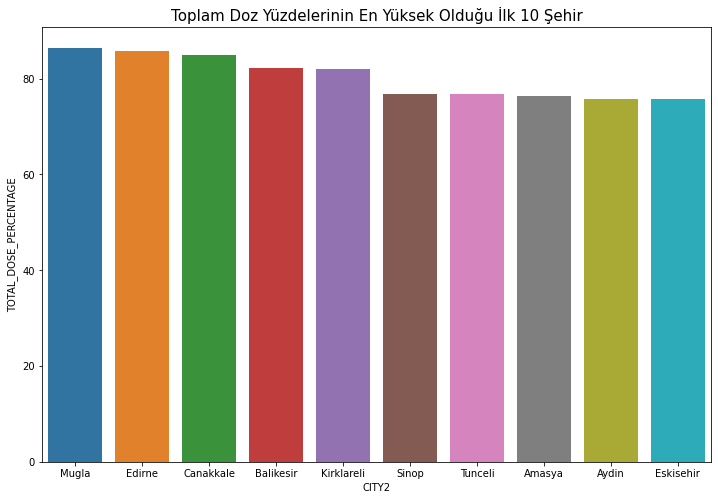

In [24]:
# Toplam Doz Yüzdelerinin En Yüksek Olduğu İlk 10 Şehir
plt.figure(figsize=(12,8))
sns.barplot(x=total_dose_percentage.iloc[:10]["CITY2"], y=total_dose_percentage.iloc[:10]["TOTAL_DOSE_PERCENTAGE"])
plt.title("Toplam Doz Yüzdelerinin En Yüksek Olduğu İlk 10 Şehir", size=15)
plt.show()

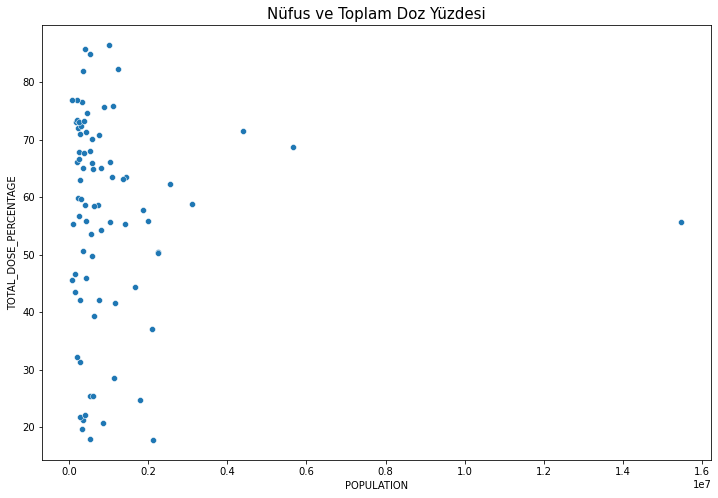

In [25]:
# Nüfus ve Toplam Doz Yüzdesi
plt.figure(figsize=(12,8))
sns.scatterplot(x=veriler["POPULATION"], y=veriler["TOTAL_DOSE_PERCENTAGE"])
plt.title("Nüfus ve Toplam Doz Yüzdesi", size=15)
plt.show()